<a href="https://colab.research.google.com/github/mikecchau/Utilizing-LinearSVM-for-stroke-prediction/blob/main/SVM_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git init

Reinitialized existing Git repository in /content/.git/


In [5]:
!git clone https://github.com/mikecchau/Utilizing-LinearSVM-for-stroke-prediction

Cloning into 'Utilizing-LinearSVM-for-stroke-prediction'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [11]:
%cd /content/Utilizing-LinearSVM-for-stroke-prediction/Data

/content/Utilizing-LinearSVM-for-stroke-prediction/Data


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [21]:
df.shape

(5110, 12)

In [23]:
df = df.drop('id', axis=1)


Drop 'id' column

In [37]:
df.tail(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5070,Female,5.00,0,0,No,children,Urban,61.98,16.800000,Unknown,0
5071,Male,81.00,0,0,Yes,Private,Rural,135.32,35.800000,Unknown,0
5072,Female,35.00,0,0,Yes,Private,Rural,58.72,40.000000,smokes,0
5073,Female,24.00,0,0,No,Private,Urban,90.42,24.300000,never smoked,0
5074,Female,52.00,0,0,Yes,Govt_job,Urban,104.00,25.600000,smokes,0
5075,Male,70.00,0,0,Yes,Private,Urban,102.50,37.800000,Unknown,0
5076,Female,34.00,0,0,Yes,Private,Rural,174.37,23.000000,never smoked,0
5077,Male,17.00,0,0,No,Private,Rural,106.56,21.000000,Unknown,0
5078,Female,8.00,0,0,No,children,Urban,76.31,15.500000,Unknown,0
5079,Male,1.72,0,0,No,children,Urban,77.28,17.100000,Unknown,0


In [17]:
from sklearn.impute import SimpleImputer

In [25]:
df['stroke'].isnull().sum()

0

There are no missing labels in the dataset

In [27]:
# Create features matrix
X = df.drop('stroke', axis=1)

In [28]:
# Create label matrix
y = df['stroke']

In [31]:
# Check for missing values in columns
for x in X:
  print(df[x].isnull().sum())

0
0
0
0
0
0
0
0
201
0


This indicates that there are 201 missing values within the 'bmi' column.

In [33]:
# Fill missing 'bmi' values with mean
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

In [35]:
# Recheck for missing values
df.isnull().values.any()

False

## Exploratory Data Analysis

Explanation of feature data (sourced from Kaggle):

* 2) gender: "Male", "Female" or "Other"
* 3) age: age of the patient
* 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* 6) ever_married: "No" or "Yes"
* 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* 8) Residence_type: "Rural" or "Urban"
* 9) avg_glucose_level: average glucose level in blood
* 10) bmi: body mass index
* 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* 12) stroke: 1 if the patient had a stroke or 0 if not

Number of patients that had stroke:  249
Number of patients that did not have stroke:  4861


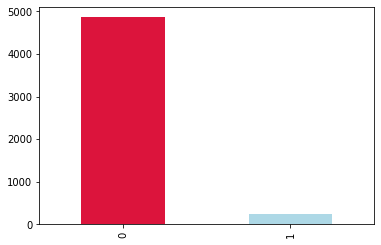

In [39]:
print('Number of patients that had stroke: ', len(df[df['stroke'] == 1]))
print('Number of patients that did not have stroke: ', len(df[df['stroke'] == 0]))
df.stroke.value_counts().plot(kind='bar', color=["crimson", "lightblue"])

The data is quite uneven, as the number of stroke patients comprises a significantly small number of the total dataset.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


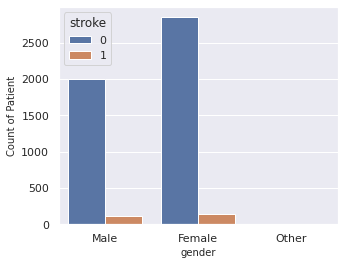

In [56]:
# Explore gender status and stroke probability
print(df['gender'].value_counts())
sns.set(rc={'figure.figsize':(5,4)})
seaborn_plot = sns.countplot(df['gender'], hue = df['stroke'])
seaborn_plot.set_xlabel("gender",fontsize=10)
seaborn_plot.set_ylabel("Count of Patient",fontsize=10);

It seems that females comprise a larger count for both stroke and non-stroke patients.

0    4612
1     498
Name: hypertension, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of Patient')

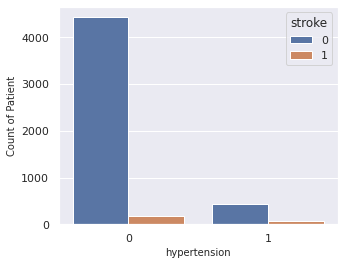

In [55]:
# Analyze hypertension and stroke probability
print(df['hypertension'].value_counts())
sns.set(rc={'figure.figsize':(5,4)})
seaborn_plot = sns.countplot(df['hypertension'], hue = df['stroke'])
seaborn_plot.set_xlabel("hypertension",fontsize=10)
seaborn_plot.set_ylabel("Count of Patient",fontsize=10)

This feature seems to have a minimal influence on probability of stroke.

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


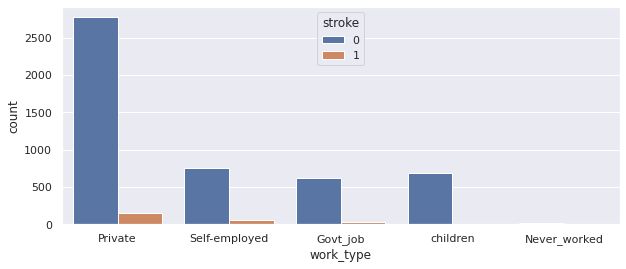

In [60]:
# Explore 'work type' and stroke probability
print(df['work_type'].value_counts())
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(df['work_type'], hue = df['stroke'])

Average age of patient:  43


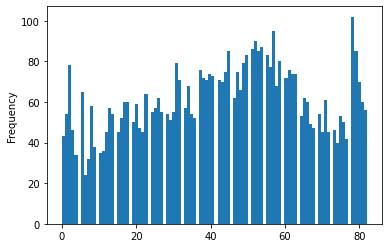

In [40]:
# Determine age profile of dataset
print('Average age of patient: ', int(df.age.mean()))
df.age.plot.hist(bins=100);

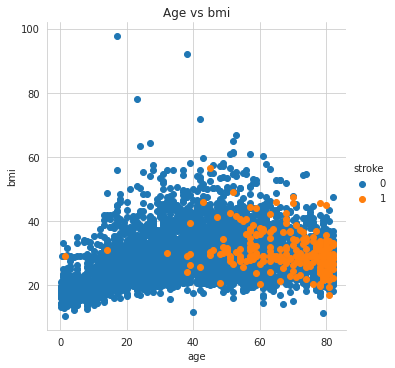

In [46]:
# Analyze age and bmi of patients in terms of stroke probability
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="stroke", height=5).map(plt.scatter, "age", "bmi").add_legend()
plt.title('Age vs bmi')
plt.show()

Based on the graph, 'age' and 'bmi' seem to heavily correlate with stroke probability.

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


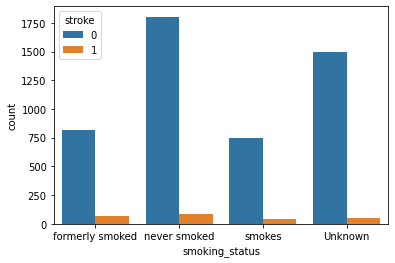

In [45]:
# Compare smoking status with likelihood of stroke
print(df['smoking_status'].value_counts())
sns.countplot(df['smoking_status'], hue = df['stroke'])

Based on the data, smoking status does not seem to have a significant influence on probability of stroke.